In [2]:
!pip install cjklib3

In [3]:
#import sys
#!{sys.executable} -m pip install cjklib
import numpy as np
import pandas as pd
import cjklib
from cjklib import characterlookup

In [4]:
df = pd.read_csv('Chinese Lexicon Project Sze et al.csv')

In [5]:
# df

In [6]:
# Import the xinhua Chinese dictionary
xinhua = pd.read_csv("xinhua.csv")

In [7]:
char = list(df.Character)
rt = list(df.RT)
xinhua_char = list(xinhua.character)
radical = list(xinhua.radical)

In [8]:
######################## Study 1 ########################

# check stroke counts
charlookup = characterlookup.CharacterLookup('T')
stroke_count = []
for i in char:
    stroke_count.append(charlookup.getStrokeCount(i))

# Uncomment to check the stroke count
#stroke_count

In [9]:
######################## Study 2 ########################
# get the radical for each character
new_char = []
radical_list = []
for i in range(len(char)):
    for j in range (len(xinhua_char)):
        if char[i] == xinhua_char[j]:
            radical_list.append(radical[j])
            new_char.append(char[i])
            
# print(radical_list)
# print(new_char)

In [10]:
# get the stroke count for each charcter in the new list
new_stroke_count = []
for i in new_char:
    new_stroke_count.append(charlookup.getStrokeCount(i))

# get the radical count for each charcter
radical_count = []
for j in radical_list:
    radical_count.append(charlookup.getStrokeCount(j))

#print(radical_count)

In [11]:
# check radical removed stroke counts
radical_removed = []
for i in range(len(new_stroke_count)):
    x = new_stroke_count[i] - radical_count[i]
    radical_removed.append(x)

#print(radical_removed)

In [12]:
# get the reaction time list for radical removed characters
new_rt = []
for i in range(len(char)):
    for j in range(len(new_char)):
        if char[i] == new_char[j]:
            new_rt.append(rt[i])
            
# new_rt

In [13]:
######################## Data Analysis ########################

import matplotlib.pyplot as plt
from scipy import stats

In [15]:
# Study 1 linear regression results
slope1, intercept1 =  np.polyﬁt(stroke_count, rt, 1)
result_1 = stats.linregress(stroke_count, rt)
print(result_1)

LinregressResult(slope=7.369933790047458, intercept=529.7896487616249, rvalue=0.3098711047884425, pvalue=8.96616586439971e-57, stderr=0.4524448772607573)


Text(0, 0.5, 'Reaction Time')

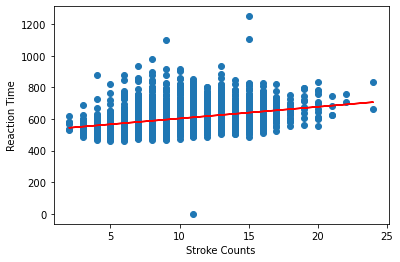

In [16]:
# Study 1 result graph
plt.scatter(stroke_count, rt)
plt.plot(stroke_count, np.multiply(slope1, stroke_count) + intercept1, 'r-')
plt.xlabel("Stroke Counts")
plt.ylabel("Reaction Time")

In [17]:
# Study 2 linear regression results
slope2, intercept2 = np.polyﬁt(radical_removed, new_rt, 1)
result_2 = stats.linregress(radical_removed, new_rt)
print(result_2)

LinregressResult(slope=7.619099272309819, intercept=555.0624164800901, rvalue=0.2790367734354089, pvalue=7.186914042240392e-46, stderr=0.5250395735895467)


Text(0, 0.5, 'Reaction Time')

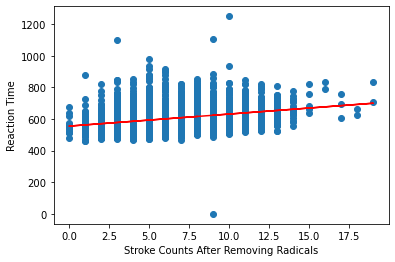

In [18]:
# Study 2 result graph
plt.scatter(radical_removed, new_rt)
plt.plot(radical_removed, np.multiply(slope2, radical_removed) + intercept2, 'r-')
plt.xlabel("Stroke Counts After Removing Radicals")
plt.ylabel("Reaction Time")

In [19]:
# correlation analysis
from scipy.stats import pearsonr
stroke_cor = pearsonr(stroke_count, rt)
radical_cor = pearsonr(radical_removed, new_rt)

# study 1 correlation
print("Correlation for study 1 is: ", stroke_cor)

# study 2 correlation
print("Correlation for study 2 is: ", radical_cor)

Correlation for study 1 is:  (0.3098711047884415, 8.966165864431881e-57)
Correlation for study 2 is:  (0.2790367734354088, 7.186914042211598e-46)


In [20]:
# Check characters with more than 20 strokes
for i in char:
    if charlookup.getStrokeCount(i) >20:
        print(i)

霸
矗
蠢
罐
躏
囊
巍
醺
